<a href="https://colab.research.google.com/github/vijay638233/Vijaya_INFO5731_Fall2024/blob/main/Vijayaramareddy_Mallidi_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
import pandas as pd
import re
import nltk
from nltk import pos_tag, word_tokenize
from collections import Counter
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

dataset = pd.read_csv('movie_reviews.csv')
df = dataset['User review'].str.lower()

# Couting the frequency of ngrams
def ngrams(data,n=3):
    text = data.split()
    n_grams = [tuple(text[i:i+n]) for i in range(len(text)-n+1)]
    return n_grams
n_grams_set = []
for item in df:
    n_grams_set.extend(ngrams(item,3))

#Frequency
frequency = Counter(n_grams_set)
frequency_count = frequency.most_common(10)
print("(1) The frequency of all the N-grams",frequency_count)

#Prbabilities for all the bigrams
bigram_count = Counter()
items_count = Counter()
for item in df:
    items = item.split()
    items_count.update(items)
    bigram_count.update(ngrams(item,2))

probability_bigram = {
    (w1,w2): count / items_count[w1]
    for (w1,w2), count in bigram_count.items()
}

print("\n(2) Probabilities of all Bigrams",probability_bigram)

#Noun phrases and relative probability
def noun(data):
    text = word_tokenize(data)
    pos_tags = pos_tag(text)
    noun_phrases = [item for item, tag in pos_tags if tag.startswith('NN')]
    return noun_phrases

all_noun_phrases = Counter()

for item in df:
    nouns = noun(item)
    all_noun_phrases.update(nouns)

frquency_noun = max(all_noun_phrases.values())

relative_prob = {
    noun:count / frquency_noun for noun, count in all_noun_phrases.items()
}

table = pd.DataFrame.from_dict(relative_prob, orient='index', columns=['Relative Probability'])

table.reset_index(inplace=True)
table.rename(columns={'index': 'Noun Phrase'}, inplace=True)
print("\nRelative Probability of Each Review:\n", table)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(1) The frequency of all the N-grams [(('a', 'lot', 'of'), 320), (('deadpool', 'and', 'wolverine'), 320), (('and', 'it', 'was'), 200), (('one', 'of', 'the'), 200), (('the', 'movie', 'is'), 160), (('it', 'was', 'a'), 160), (('a', 'bunch', 'of'), 120), (('the', 'movie', 'and'), 120), (("don't", 'want', 'to'), 120), (('the', 'first', '2'), 120)]

(2) Probabilities of all Bigrams {('hugh', 'jackman'): 0.8, ('jackman', 'is'): 0.6, ('is', 'the'): 0.07142857142857142, ('the', 'perfect'): 0.0058823529411764705, ('perfect', 'wolverine.'): 0.2, ('wolverine.', 'what'): 1.0, ('what', 'a'): 0.08333333333333333, ('a', 'fun'): 0.01935483870967742, ('fun', 'movie.'): 0.058823529411764705, ('movie.', 'i'): 0.16666666666666666, ('i', 'like'): 0.013157894736842105, ('like', 'the'): 0.15384615384615385, ('the', 'dialogue'): 0.0029411764705882353, ('dialogue', 'and'): 1.0, ('and', 'clever'): 0.005319148936170213, ('clever', 'quips'): 0.5, ('quips', 'with'): 1.0, ('with', 'f'): 0.022727272727272728, ('f', '

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
from math import log, sqrt

def tf(data):
    t_f = Counter(data.split())
    items = len(data.split())
    return {item: count / items for item, count in t_f.items()}

def idf(data):
    length = len(data)
    i_d_f = {}
    items = set(item for d in data for item in d.split())
    for item in items:
        sum_item = sum(1 for d in data if item in d.split())
        i_d_f[item] = log(length / (1 + sum_item))
    return i_d_f

tf_idf_matrix = []
review_df = df.tolist()
idf_review = idf(review_df)

for review in review_df:
    tf_review = tf(review)
    tf_idf ={
        item: tf_review[item] * idf_review[item] for item in tf_review
    }
    tf_idf_matrix.append(tf_idf)

print("Documents-terms weights(tf * idf) Matrix\n",tf_idf_matrix[:2])

# Ranking the documents using a query

def cosine_similarity(tf_idf_review,tf_idf_query):
    product = sum(tf_idf_review.get(item,0) * tf_idf_query.get(item,0 ) for item in tf_idf_query)
    norm_item = sqrt(sum(value ** 2 for value in tf_idf_review.values()))
    norm_query = sqrt(sum(value ** 2 for value in tf_idf_query.values()))
    return product / (norm_item *norm_query ) if norm_item * norm_query !=0 else 0

query = "An outstanding movie with a haunting performance and best character development"
tfidf_query = {item: tf(query).get(item, 0) * idf_review.get(item, 0) for item in set(query.split())}
similarities = [cosine_similarity(tfidf, tfidf_query) for tfidf in tf_idf_matrix]
rank = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)
print("\nRanked documents based on Similarity\n", rank[:5])

Documents-terms weights(tf * idf) Matrix
 [{'hugh': 0.012534768522836416, 'jackman': 0.012534768522836416, 'is': 0.0051111897140185625, 'the': 0.001864728281805209, 'perfect': 0.012534768522836416, 'wolverine.': 0.02495455634592054, 'what': 0.005717875069346687, 'a': 0.0009323641409026045, 'fun': 0.021417043398646123, 'movie.': 0.012534768522836416, 'i': 0.009469885414565025, 'like': 0.006396175027619461, 'dialogue': 0.019635204096169517, 'and': 0.0009323641409026045, 'clever': 0.019635204096169517, 'quips': 0.02495455634592054, 'with': 0.0017335494680763889, 'f': 0.02495455634592054, 'bombs': 0.02495455634592054, 'sprinkled': 0.02495455634592054, 'in.': 0.02495455634592054, "it's": 0.011435750138693374, 'definitely': 0.022233724148304407, 'not': 0.004515893542651881, 'taking': 0.019635204096169517, 'itself': 0.019635204096169517, 'too': 0.025069537045672833, 'seriously.': 0.02495455634592054, 'there': 0.010187581831699533, 'tons': 0.016499724479573406, 'of': -1.5617192704429677e-05, '

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


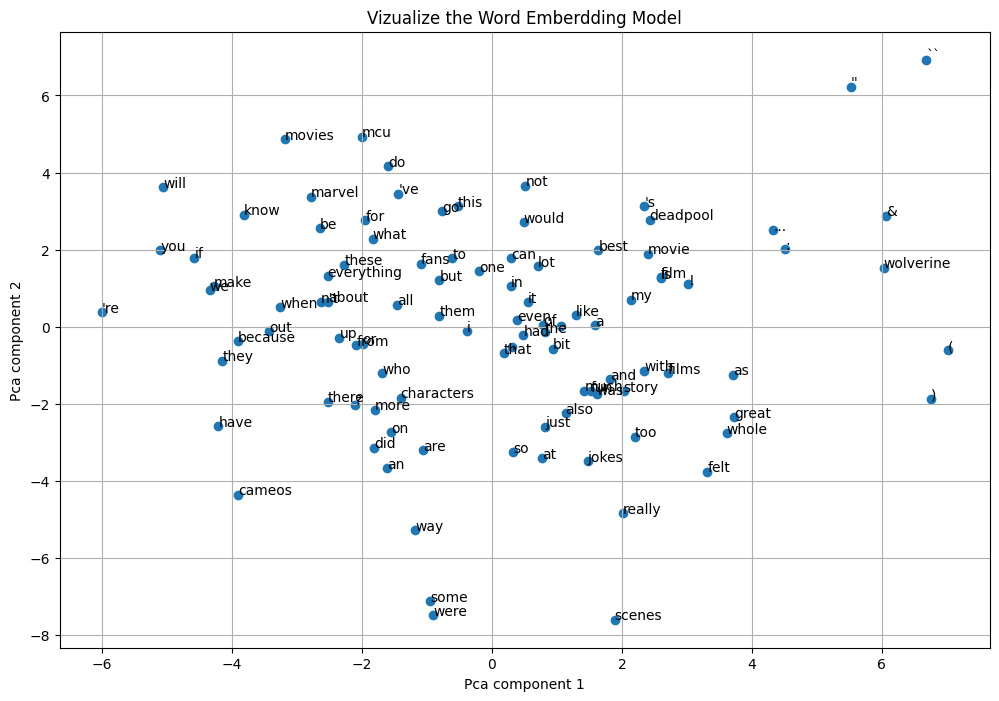

In [ ]:
# Write your code here
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
nltk.download('punkt')

list_reviews = dataset['User review'].tolist()
tokenize_reviews = [nltk.word_tokenize(review.lower()) for review in list_reviews]

word_model = Word2Vec(sentences=tokenize_reviews, vector_size=300, window=5, min_count=1, sg=0)
word_model.save("word2vec_model.word_model")

def plot(word_model, num_words=100):
    words = list(word_model.wv.index_to_key)[:num_words]
    embeddings = word_model.wv[words]

    pca = PCA(n_components=2)
    result = pca.fit_transform(embeddings)

    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1])

    for i, item in enumerate(words):
        plt.annotate(item, (result[i, 0], result[i, 1]))

    plt.title("Vizualize the Word Emberdding Model")
    plt.xlabel("Pca component 1")
    plt.ylabel("Pca component 2")
    plt.grid()
    plt.show()
plot(word_model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/vijay638233/Vijaya_INFO5731_Fall2024/blob/main/movie_reviews_sentiment.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
#The data in this work provided a variety of insights in the area of learning and applying word embeddings and document representation what I found to be both difficult as well as interesting. The biggest challenge was creating the TF-IDF measures and the computation of cosine distances as a separate issue in its own right. I was also responsible for the consistency of each computational stage but this implies an accurate implementation of rudimentary data structures and algorithms in a moderately complicated way. Another complex aspect which needed to be completed beforehand was a set of actions: data cleansing, tokenization, and normalization of the raw text due to which the analysis could have been biased. These difficulties stimulated me to improve my programming and get more insights about the concepts of natural language processing.

#Moreover, the activity of visualizing word embeddings was exciting in itself. I was happy to see how the model has learned and represented the semantic relation among the words tense and their lower dimension representation. It was also extremely satisfying to apply methods including PCA or t-SNE to visualize the embedding and bring the theory into practice to understand the structure of the data. Movie reviews were favorable material for such analysis – it was interesting to see the impact of sentiment and context on keywords relations. In conclusion, the task was indeed multifaceted, though the amount of time available seemed reasonable for the given scope of topics. Nonetheless, it is reasonable to assume that other resources or tutorials yet concerning such concepts, particularly for people new to the subject of machine learning or NLP, would further enhance learning in this discipline and facilitate the process of implementation.


